<a href="https://colab.research.google.com/github/INHARYU/aipython/blob/main/2024_05_24_ai%ED%8C%8C%EC%9D%B4%EC%8D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# 아이리스 데이터 1.데이터 파일 읽어오기 2. 데이터의 기본 정보 출력 3. 데이터의 기초 통계량 출력 4. 품종별 개수 구하기
dfi=pd.read_csv('/content/drive/MyDrive/ai파이썬/data/11주차/iris.csv')
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
species_counts = dfi['species'].value_counts()
print(species_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [33]:
# 데이터 전처리 1. 결측치 확인 2. 중복데이터 확인 3. 중복데이터 모두 확인 4. 중복데이터 삭제
dfi.isnull().sum()
dfi.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
dfi[dfi.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [73]:
#중복데이터 모두 확인
idx= (dfi['sepal_length']==5.8) & (dfi['petal_width']==1.9)
dfi.loc[idx,:]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [35]:
#중복데이터 삭제
dfi2=dfi.drop_duplicates()

In [74]:
dfi2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [76]:
# 데이터 그룹핑 1. 품종 열을 기준으로 합계 구하기 2. 품종 열을 기준으로 평균구하기
dfi2.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [77]:
dfi2.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [37]:
# 데이터 시각화 1. 막대그리프 그리기 1-1 꽃받침 길이의 시각화 1-2 붓꽃 종류별 꽃받침 길이의 평균에

Text(0, 0.5, 'Sepal length(cm)')

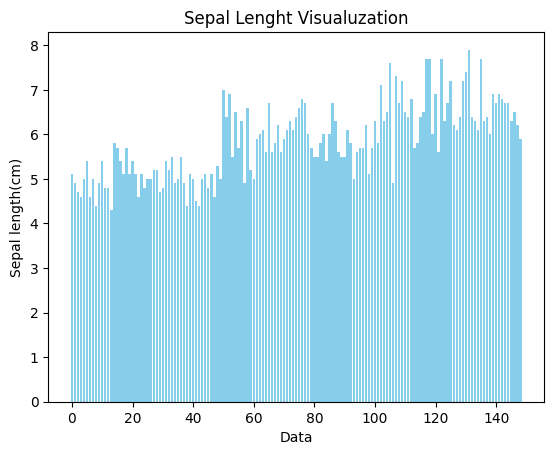

In [80]:
sepal_length = dfi2['sepal_length']
plt.bar(range(len(sepal_length)), sepal_length, color='skyblue')
plt.title('Sepal Lenght Visualuzation')
plt.xlabel('Data')
plt.ylabel('Sepal length(cm)')

<Axes: xlabel='species'>

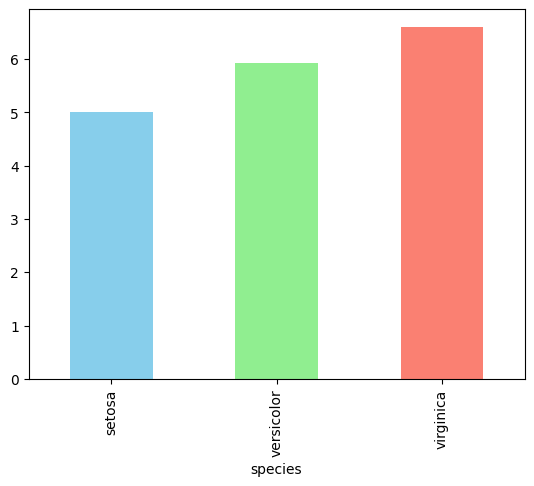

In [81]:
species_mean1 = dfi2.groupby('species')['sepal_length'].mean()
species_mean1.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])


In [ ]:
plt.bar(dfi2.index, dfi2)

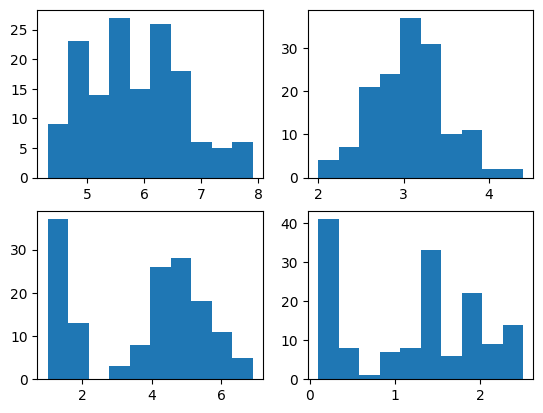

In [39]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(dfi2['sepal_length'])
axs[0,1].hist(dfi2['sepal_width'])
axs[1,0].hist(dfi2['petal_length'])
axs[1,1].hist(dfi2['petal_width'])
plt.show()

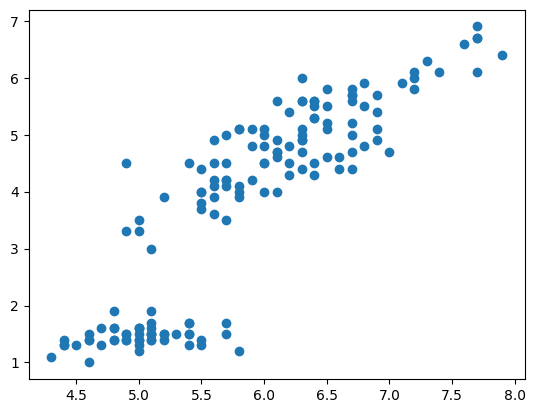

In [40]:
# 데이터 시각화 3. 산점도 그래프 그리기 꽃받침 길이와 꽃잎의 길이의 산점도 시각화
x = dfi2['sepal_length']
y = dfi2['petal_length']

plt.scatter(x,y)
plt.show()